In [1]:
#Import the needed modules
!pip install preprocessing
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.applications import * 
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from skimage import io, transform
from sklearn.cluster import KMeans
from keras.layers import Dropout
%matplotlib inline

     |████████████████████████████████| 349 kB 8.2 MB/s 
     |████████████████████████████████| 1.4 MB 38.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.9 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367724 sha256=cd58cd00679840222e48f13711d9e8d85fe7d0240cc800aa87b4b24392a58570
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

In [4]:
# Create the function to resize the dataset.
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example
def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))  
    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }   
    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    for image_features in full_dataset:
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299])        
        image=image.numpy()
        image=cv2.resize(image,(100,100))
        image=cv2.merge([image,image,image])        
        images.append(image)
        labels.append(image_features['label_normal'].numpy())

In [5]:
#Import and read data
filenames=['/content/gdrive/MyDrive/CSE676_PROJECT/training10_0.tfrecords',
          '/content/gdrive/MyDrive/CSE676_PROJECT/training10_1.tfrecords',
          '/content/gdrive/MyDrive/CSE676_PROJECT/training10_2.tfrecords',
          '/content/gdrive/MyDrive/CSE676_PROJECT/training10_3.tfrecords',
          '/content/gdrive/MyDrive/CSE676_PROJECT/training10_4.tfrecords']
for file in filenames:
    read_data(file)

Size of Training Dataset:  11177
<ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [6]:
#Normalize the data
X=np.array(images)
Y=np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,shuffle=True)
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

Epoch 1/30
978/978 [==============================] - 34s 22ms/step - loss: 1.7547 - accuracy: 0.7945 - val_loss: 2.2641 - val_accuracy: 0.8705
Epoch 2/30
978/978 [==============================] - 21s 21ms/step - loss: 2.2386 - accuracy: 0.8707 - val_loss: 1.4766 - val_accuracy: 0.8684
Epoch 3/30
978/978 [==============================] - 21s 21ms/step - loss: 1.8562 - accuracy: 0.8765 - val_loss: 1.2767 - val_accuracy: 0.8854
Epoch 4/30
978/978 [==============================] - 21s 21ms/step - loss: 1.6186 - accuracy: 0.8772 - val_loss: 1.0281 - val_accuracy: 0.8707
Epoch 5/30
978/978 [==============================] - 21s 21ms/step - loss: 1.4406 - accuracy: 0.8788 - val_loss: 0.8287 - val_accuracy: 0.8736
Epoch 6/30
978/978 [==============================] - 21s 21ms/step - loss: 1.2980 - accuracy: 0.8770 - val_loss: 0.7712 - val_accuracy: 0.8705
Epoch 7/30
978/978 [==============================] - 21s 21ms/step - loss: 1.2396 - accuracy: 0.8795 - val_loss: 0.7100 - val_accuracy:

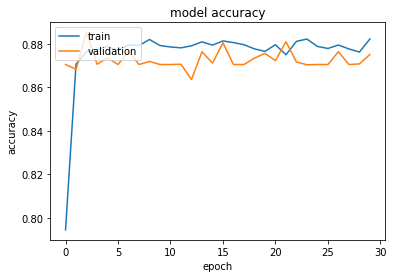

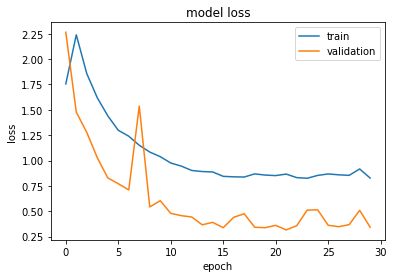

In [7]:
#CNN model for one layer
filename='cnn_onelayer.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
cnn1_model=tf.keras.Sequential([
tf.keras.layers.Conv2D(64,(5,5),input_shape=(100,100,3),activation='silu'),
tf.keras.layers.MaxPooling2D(2,2), # First Convolution and Pooling Layers
# tf.keras.layers.Dropout(0.2)
])
cnn1_model.add(Flatten())
cnn1_model.add(Dense(8,activation='silu',kernel_regularizer=regularizers.L1(0.0001)))
cnn1_model.add(BatchNormalization())
cnn1_model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.L1(0.0001)))
cnn1_model.add(Dropout(0.3))
opt = Adam(learning_rate=0.001)
cnn1_model.compile(optimizer=opt,loss = 'binary_crossentropy' , metrics = ['accuracy'])
history1 = cnn1_model.fit(x_train_normalize ,y_train,epochs=30,batch_size=32,validation_split=0.2,callbacks=[history_logger])
loss_value , accuracy = cnn1_model.evaluate(x_test_normalize,y_test)
print(loss_value,accuracy)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Epoch 1/30
978/978 [==============================] - 34s 24ms/step - loss: 1.4325 - accuracy: 0.6018 - val_loss: 0.7383 - val_accuracy: 0.6424
Epoch 2/30
978/978 [==============================] - 22s 23ms/step - loss: 1.0010 - accuracy: 0.8575 - val_loss: 0.3534 - val_accuracy: 0.8804
Epoch 3/30
978/978 [==============================] - 22s 23ms/step - loss: 0.9022 - accuracy: 0.8804 - val_loss: 0.3366 - val_accuracy: 0.8949
Epoch 4/30
978/978 [==============================] - 22s 23ms/step - loss: 0.8783 - accuracy: 0.8801 - val_loss: 0.3168 - val_accuracy: 0.8805
Epoch 5/30
978/978 [==============================] - 22s 23ms/step - loss: 0.9032 - accuracy: 0.8753 - val_loss: 0.3493 - val_accuracy: 0.8801
Epoch 6/30
978/978 [==============================] - 22s 23ms/step - loss: 0.8426 - accuracy: 0.8783 - val_loss: 0.3258 - val_accuracy: 0.8894
Epoch 7/30
978/978 [==============================] - 22s 23ms/step - loss: 0.8761 - accuracy: 0.8790 - val_loss: 0.3099 - val_accuracy:

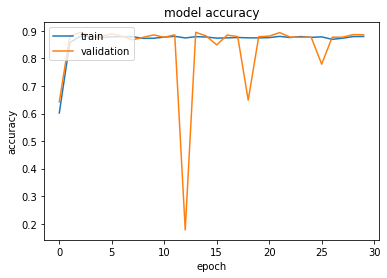

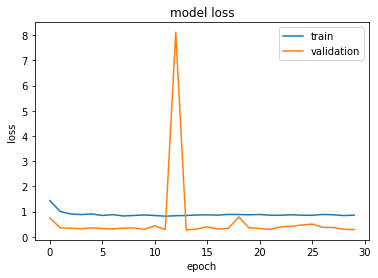

In [7]:
# CNN model for two layers
filename='cnn_twolayer.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
cnn2_model=tf.keras.Sequential([
tf.keras.layers.Conv2D(64,(5,5),input_shape=(100,100,3),activation='silu'),
tf.keras.layers.MaxPooling2D(2,2), # First Convolution and Pooling Layers
tf.keras.layers.Conv2D(16,(2,2),activation='silu'),
tf.keras.layers.MaxPooling2D(2,2), # Second Convolution and Pooling Layers
# tf.keras.layers.Dropout(0.2)
])
cnn2_model.add(Flatten())
cnn2_model.add(Dense(8, activation='silu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001)))
cnn2_model.add(BatchNormalization())
cnn2_model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.L1(0.0001)))
cnn2_model.add(Dropout(0.3))
opt = Adam(learning_rate=0.001)
cnn2_model.compile(optimizer = opt,loss = 'binary_crossentropy' , metrics = ['accuracy'])
history2 = cnn2_model.fit(x_train_normalize ,y_train,epochs=30,batch_size=32,validation_split=0.2,callbacks=[history_logger])
loss_value , accuracy = cnn2_model.evaluate(x_test_normalize,y_test)
print(loss_value,accuracy)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Epoch 1/30
978/978 [==============================] - 34s 21ms/step - loss: 0.9221 - accuracy: 0.8045 - val_loss: 0.2976 - val_accuracy: 0.8758
Epoch 2/30
978/978 [==============================] - 19s 19ms/step - loss: 0.8427 - accuracy: 0.8794 - val_loss: 0.2907 - val_accuracy: 0.8787
Epoch 3/30
978/978 [==============================] - 19s 19ms/step - loss: 0.8081 - accuracy: 0.8817 - val_loss: 0.2851 - val_accuracy: 0.8842
Epoch 4/30
978/978 [==============================] - 19s 19ms/step - loss: 0.8138 - accuracy: 0.8887 - val_loss: 0.2438 - val_accuracy: 0.9011
Epoch 5/30
978/978 [==============================] - 19s 20ms/step - loss: 0.8323 - accuracy: 0.8773 - val_loss: 0.3877 - val_accuracy: 0.8758
Epoch 6/30
978/978 [==============================] - 19s 19ms/step - loss: 0.8791 - accuracy: 0.8691 - val_loss: 0.3850 - val_accuracy: 0.8758
Epoch 7/30
978/978 [==============================] - 19s 19ms/step - loss: 0.8727 - accuracy: 0.8691 - val_loss: 0.3825 - val_accuracy:

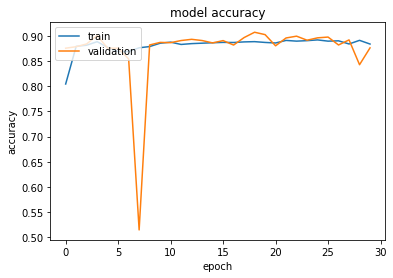

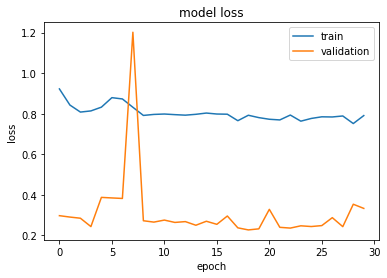

In [7]:
# CNN model for five layers
filename='cnn_fivelayer.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
cnn5_model=tf.keras.Sequential([
tf.keras.layers.Conv2D(64,(5,5),input_shape=(100,100,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), # First Convolution and Pooling Layers
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), # Second Convolution and Pooling Layers
tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), # Third Convolution and Pooling Layers
tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), 
tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2), 
])
cnn5_model.add(Flatten())
cnn5_model.add(Dense(8, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001)))
cnn5_model.add(BatchNormalization())
cnn5_model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.L1(0.0001)))
cnn5_model.add(Dropout(0.3))
opt = Adam(learning_rate=0.001)
cnn5_model.compile(optimizer = opt,loss = 'binary_crossentropy' , metrics = ['accuracy'])
# history = cnn_model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=10)
history5 = cnn5_model.fit(x_train_normalize ,y_train,epochs=30,batch_size=32,validation_split=0.2,callbacks=[history_logger])
loss_value , accuracy = cnn5_model.evaluate(x_test_normalize,y_test)
print(loss_value,accuracy)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/30
978/978 [==============================] - 113s 108ms/step - loss: 0.4505 - accuracy: 0.8338 - val_loss: 0.6348 - val_accuracy: 0.8758
Epoch 2/30
978/978 [==============================] - 106s 108ms/step - loss: 0.2999 - accuracy: 0.8845 - val_loss: 0.4919 - val_accuracy: 0.8434
Epoch 3/30
978/978 [==============================] - 107s 109ms/step - loss: 0.2461 - accuracy: 0.9032 - val_loss: 0.3404 - val_accuracy: 0.8924
Epoch 4/30
978/978 [==============================] - 107s 109ms/step - loss: 0.2303 - accuracy: 0.9093 - val_loss: 0.3713 - val_accuracy: 0.8685
Epoch 5/30
978/978 [==============================] - 106s 109ms/step - loss: 0.2123 - accuracy: 0.9184 - val_loss: 0.4682 - val_accuracy: 0.8797
Epoch 6/30
978/978 [==============================] - 107s 109ms/step - loss: 0.1979 - accuracy: 0.9241 - val_loss: 1.1363 - val_accuracy: 0.8634
Epoch 7/30
978/978 [==============================] - 107s 

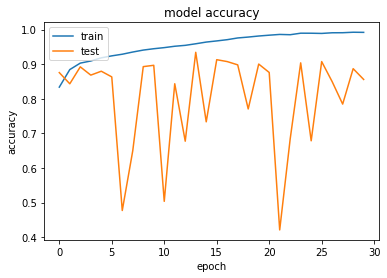

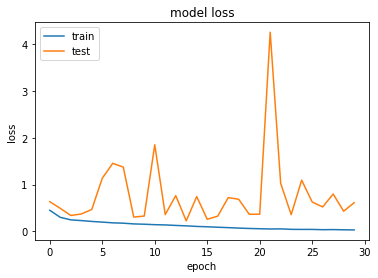

In [8]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True, verbose=4)
filename='ResNet50.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
opt = Adam(learning_rate=0.001)
base_model =ResNet50(input_shape=(100,100,3), weights='imagenet', include_top=False)
model50=Sequential()
model50.add(base_model)
model50.add(Flatten())
model50.add(Dense(8,kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001),activation='relu'))
model50.add(BatchNormalization())
model50.add(Dropout(0.3))
model50.add(Dense(1,activation='sigmoid'))
model50.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
history50= model50.fit(x_train_normalize , y_train,validation_split=0.2,epochs=30, batch_size=32,callbacks=[history_logger])
loss_value , accuracy = model50.evaluate(x_test_normalize, y_test)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))
plt.plot(history50.history['accuracy'])
plt.plot(history50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history50.history['loss'])
plt.plot(history50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/30
978/978 [==============================] - 43s 40ms/step - loss: 0.3669 - accuracy: 0.8755 - val_loss: 0.2734 - val_accuracy: 0.8753
Epoch 2/30
978/978 [==============================] - 38s 39ms/step - loss: 0.1667 - accuracy: 0.9467 - val_loss: 0.1674 - val_accuracy: 0.9443
Epoch 3/30
978/978 [==============================] - 39s 39ms/step - loss: 0.1412 - accuracy: 0.9547 - val_loss: 0.1778 - val_accuracy: 0.9378
Epoch 4/30
978/978 [==============================] - 38s 39ms/step - loss: 0.1270 - accuracy: 0.9586 - val_loss: 0.1439 - val_accuracy: 0.9509
Epoch 5/30
978/978 [==============================] - 39s 40ms/step - loss: 0.1181 - accuracy: 0.9621 - val_loss: 0.1156 - val_accuracy: 0.9611
Epoch 6/30
978/978 [==============================] - 39s 40ms/step - loss: 0.1045 - accuracy: 0.9688 - val_loss: 0.1309 - val_accuracy: 0.9544
Epoch 7/30
978/978 [==============================] - 39s 40ms/step - l

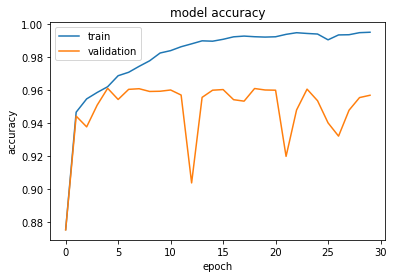

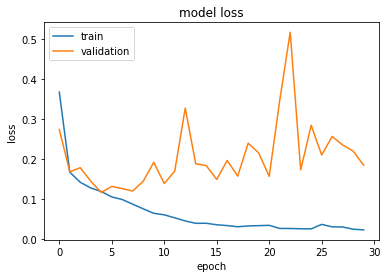

In [9]:
filename='MobileNet.csv'
opt = Adam(learning_rate=0.001)
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
base_model2 =MobileNet(input_shape=(100,100,3), weights='imagenet', include_top=False)
modelmo=Sequential()
modelmo.add(base_model2)
# modelmo.add(Dropout(0.3))
modelmo.add(Flatten())
modelmo.add(Dense(8,kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001),activation='relu'))
modelmo.add(BatchNormalization())
modelmo.add(Dropout(0.3))
modelmo.add(Dense(1,activation='sigmoid'))
modelmo.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
historymo = modelmo.fit(x_train_normalize, y_train,validation_split=0.2,shuffle=True, epochs=30, batch_size=32,callbacks=[history_logger])
loss_value , accuracy = modelmo.evaluate(x_test_normalize, y_test)
print("="*20)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))
plt.plot(historymo.history['accuracy'])
plt.plot(historymo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historymo.history['loss'])
plt.plot(historymo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
filename='VGG16.csv'
opt = Adam(learning_rate=0.001)
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
base_model3 =VGG16(input_shape=(100,100,3), weights='imagenet', include_top=False)
modelv16=Sequential()
modelv16.add(base_model3)
modelv16.add(Dropout(0.3))
modelv16.add(Flatten())
modelv16.add(Dense(8,kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001),activation='relu'))
modelv16.add(BatchNormalization())
modelv16.add(Dropout(0.3))
modelv16.add(Dense(1,activation='sigmoid'))
modelv16.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
historyv16 = modelv16.fit(x_train_normalize, y_train,validation_split=0.2,shuffle=True, epochs=30, batch_size=32,callbacks=[history_logger])
loss_value , accuracy = modelv16.evaluate(x_test_normalize, y_test)
print("="*20)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))
plt.plot(historyv16.history['accuracy'])
plt.plot(historyv16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyv16.history['loss'])
plt.plot(historyv16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/30
978/978 [==============================] - 113s 112ms/step - loss: 0.4007 - accuracy: 0.8499 - val_loss: 0.2595 - val_accuracy: 0.8997
Epoch 2/30
978/978 [==============================] - 108s 110ms/step - loss: 0.3126 - accuracy: 0.8795 - val_loss: 0.3747 - val_accuracy: 0.8760
Epoch 3/30
978/978 [==============================] - 108s 110ms/step - loss: 0.2804 - accuracy: 0.8906 - val_loss: 0.2431 - val_accuracy: 0.9077
Epoch 4/30
978/978 [==============================] - 108s 110ms/step - loss: 0.2689 - accuracy: 0.8924 - val_loss: 0.2360 - val_accuracy: 0.9045
Epoch 5/30
978/978 [==============================] - 108s 110ms/step - loss: 0.2650 - accuracy: 0.8934 - val_loss: 0.2316 - val_accuracy: 0.9078
Epoch 6/30
978/978 [==============================] - 108s 110ms/step - loss: 0.2598 - accuracy: 0.8964 - val_loss: 0.2533 - val_accuracy: 0.8975
Epoch 7/30
978/978 [==============================] - 108s 

80150528/80134624 [==============================] - 0s 0us/step
Epoch 1/30
978/978 [==============================] - 90s 78ms/step - loss: 0.4107 - accuracy: 0.8363 - val_loss: 1.7344 - val_accuracy: 0.4847
Epoch 2/30
978/978 [==============================] - 75s 76ms/step - loss: 0.3130 - accuracy: 0.8764 - val_loss: 0.2669 - val_accuracy: 0.9032
Epoch 3/30
978/978 [==============================] - 74s 76ms/step - loss: 0.2858 - accuracy: 0.8878 - val_loss: 0.2770 - val_accuracy: 0.8946
Epoch 4/30
978/978 [==============================] - 74s 76ms/step - loss: 0.2779 - accuracy: 0.8921 - val_loss: 0.4892 - val_accuracy: 0.8783
Epoch 5/30
978/978 [==============================] - 74s 76ms/step - loss: 0.2716 - accuracy: 0.8935 - val_loss: 0.2816 - val_accuracy: 0.8882
Epoch 6/30
978/978 [==============================] - 74s 76ms/step - loss: 0.2686 - accuracy: 0.8937 - val_loss: 0.2528 - val_accuracy: 0.9054
Epoch 7/30
978/978 [==============================] - 74s 76ms/step - l

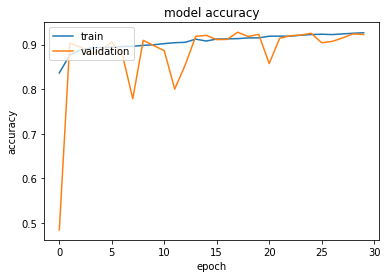

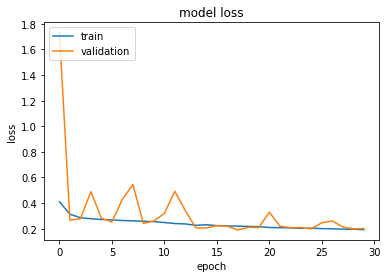

In [7]:
filename='VGG19.csv'
opt = Adam(learning_rate=0.001)
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
base_model4 =VGG19(input_shape=(100,100,3), weights='imagenet', include_top=False)
modelv19=Sequential()
modelv19.add(base_model4)
modelv19.add(Dropout(0.3))
modelv19.add(Flatten())
modelv19.add(Dense(8,kernel_initializer='he_uniform',kernel_regularizer=regularizers.L1(0.0001),activation='relu'))
modelv19.add(BatchNormalization())
modelv19.add(Dropout(0.3))
modelv19.add(Dense(1,activation='sigmoid'))
modelv19.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
historyv19 = modelv19.fit(x_train_normalize, y_train,validation_split=0.2,shuffle=True, epochs=30, batch_size=32,callbacks=[history_logger])
loss_value , accuracy = modelv19.evaluate(x_test_normalize, y_test)
print("="*20)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))
plt.plot(historyv19.history['accuracy'])
plt.plot(historyv19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyv19.history['loss'])
plt.plot(historyv19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

524/524 [==============================] - 13s 25ms/step - loss: 0.2012 - accuracy: 0.9254
Test_loss_value = 0.2011735588312149
test_accuracy = 0.9253847002983093


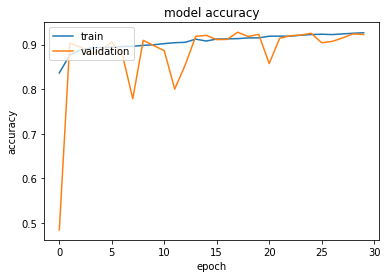

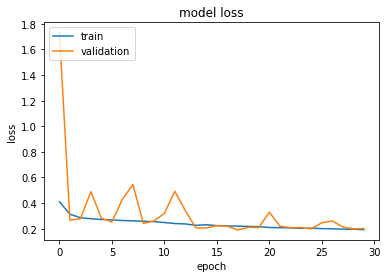

In [9]:
loss_value , accuracy = modelv19.evaluate(x_test_normalize, y_test)
print("="*20)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))
plt.plot(historyv19.history['accuracy'])
plt.plot(historyv19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyv19.history['loss'])
plt.plot(historyv19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
!pip install -U tensorflow-addons  

     |████████████████████████████████| 1.1 MB 7.4 MB/s 


In [8]:
import tensorflow_addons as tfa
import keras

In [9]:
num_classes = 2
input_shape = (100, 100, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 30
image_size = 100  # We'll resize input images to this size
patch_size = 4 # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 32
filename='transformer_vision.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 1
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [10]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [11]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [12]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [13]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    output= layers.Dense(1,activation='sigmoid')(features)
    # Create the Keras model.
    model = Model(inputs=inputs, outputs=output)
    return model

In [14]:
def run_experiment(model):
    optimizer = tf.keras.optimizers.Adam(
        lr=learning_rate
    )

    model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint_filepath = "/tmp/checkpoint"
    history = model.fit(
        x=x_train_normalize,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.2,
        callbacks=[history_logger]
    )
    loss_value , accuracy = model.evaluate(x_test_normalize, y_test)
    print("="*20)
    print('Test_loss_value = ' +str(loss_value))
    print('test_accuracy = ' + str(accuracy))
    return history
vit_classifier = create_vit_classifier()
historyvt = run_experiment(vit_classifier)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
978/978 [==============================] - 48s 42ms/step - loss: 0.6337 - accuracy: 0.8557 - val_loss: 0.2810 - val_accuracy: 0.8795
Epoch 2/30
978/978 [==============================] - 39s 40ms/step - loss: 0.3025 - accuracy: 0.8765 - val_loss: 0.2644 - val_accuracy: 0.8856
Epoch 3/30
978/978 [==============================] - 39s 40ms/step - loss: 0.2888 - accuracy: 0.8821 - val_loss: 0.2730 - val_accuracy: 0.8832
Epoch 4/30
978/978 [==============================] - 39s 40ms/step - loss: 0.2767 - accuracy: 0.8885 - val_loss: 0.2587 - val_accuracy: 0.8891
Epoch 5/30
978/978 [==============================] - 39s 40ms/step - loss: 0.2737 - accuracy: 0.8897 - val_loss: 0.2514 - val_accuracy: 0.8998
Epoch 6/30
978/978 [==============================] - 39s 40ms/step - loss: 0.2754 - accuracy: 0.8912 - val_loss: 0.2552 - val_accuracy: 0.8947
Epoch 7/30
978/978 [==============================] - 39s 40ms/step - loss: 0.2712 - accuracy: 0.8904 - val_loss: 0.2629 - val_accuracy:

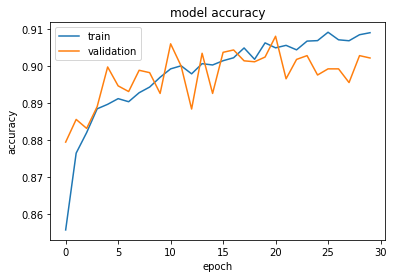

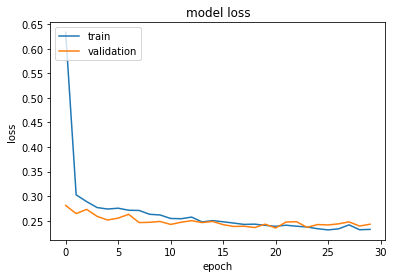

In [29]:
plt.plot(historyvt.history['accuracy'])
plt.plot(historyvt.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyvt.history['loss'])
plt.plot(historyvt.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
num_classes = 2
input_shape = (100,100,3)
weight_decay = 0.0001
learning_rate = 0.001
label_smoothing = 0.1
validation_split = 0.2
batch_size = 32
num_epochs =30
patch_size = 2  # Size of the patches to be extracted from the input images.
num_patches = (input_shape[0] // patch_size) ** 2  # Number of patch
embedding_dim = 64  # Number of hidden units.
mlp_dim = 64
dim_coefficient = 4
num_heads = 4
attention_dropout = 0.2
projection_dropout = 0.2
num_transformer_blocks = 1  # Number of repetitions of the transformer layer
filename='EAN.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size, self.patch_size, 1),
            strides=(1, self.patch_size, self.patch_size, 1),
            rates=(1, 1, 1, 1),
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))
class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super(PatchEmbedding, self).__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)

    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)

In [34]:
def external_attention(x, dim, num_heads, dim_coefficient=4, attention_dropout=0, projection_dropout=0):
    _, num_patch, channel = x.shape
    assert dim % num_heads == 0
    num_heads = num_heads * dim_coefficient

    x = layers.Dense(dim * dim_coefficient)(x)
    # create tensor [batch_size, num_patches, num_heads, dim*dim_coefficient//num_heads]
    x = tf.reshape(
        x, shape=(-1, num_patch, num_heads, dim * dim_coefficient // num_heads)
    )
    x = tf.transpose(x, perm=[0, 2, 1, 3])
    # a linear layer M_k
    attn = layers.Dense(dim // dim_coefficient)(x)
    # normalize attention map
    attn = layers.Softmax(axis=2)(attn)
    # dobule-normalization
    attn = attn / (1e-9 + tf.reduce_sum(attn, axis=-1, keepdims=True))
    attn = layers.Dropout(attention_dropout)(attn)
    # a linear layer M_v
    x = layers.Dense(dim * dim_coefficient // num_heads)(attn)
    x = tf.transpose(x, perm=[0, 2, 1, 3])
    x = tf.reshape(x, [-1, num_patch, dim * dim_coefficient])
    # a linear layer to project original dim
    x = layers.Dense(dim)(x)
    x = layers.Dropout(projection_dropout)(x)
    return x
def mlp(x, embedding_dim, mlp_dim, drop_rate=0.2):
  x = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x)
  x = layers.Dropout(drop_rate)(x)
  x = layers.Dense(embedding_dim)(x)
  x = layers.Dropout(drop_rate)(x)
  return x
def transformer_encoder(
    x,
    embedding_dim,
    mlp_dim,
    num_heads,
    dim_coefficient,
    attention_dropout,
    projection_dropout,
    attention_type="external_attention",
):
    residual_1 = x
    x = layers.LayerNormalization(epsilon=1e-5)(x)
    if attention_type == "external_attention":
        x = external_attention(
            x,
            embedding_dim,
            num_heads,
            dim_coefficient,
            attention_dropout,
            projection_dropout,
        )
    elif attention_type == "self_attention":
        x = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=attention_dropout
        )(x, x)
    x = layers.add([x, residual_1])
    residual_2 = x
    x = layers.LayerNormalization(epsilon=1e-5)(x)
    x = mlp(x, embedding_dim, mlp_dim)
    x = layers.add([x, residual_2])
    return x
def get_model(attention_type="external_attention"):
    inputs = layers.Input(shape=input_shape)
    # Extract patches.
    x = PatchExtract(patch_size)(inputs)
    # Create patch embedding.
    x = PatchEmbedding(num_patches, embedding_dim)(x)
    # Create Transformer block.
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(
            x,
            embedding_dim,
            mlp_dim,
            num_heads,
            dim_coefficient,
            attention_dropout,
            projection_dropout,
            attention_type,
        )

    x = layers.GlobalAvgPool1D()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model
modelean = get_model(attention_type="external_attention")
optimizer = tf.keras.optimizers.Adam(
        lr=learning_rate,decay=weight_decay)
modelean.compile(
    loss='binary_crossentropy',metrics=['accuracy'],
    optimizer=optimizer,
)

historyean = modelean.fit(x=x_train_normalize,y=y_train,batch_size=batch_size,epochs=num_epochs,validation_split=0.2,callbacks=[history_logger])
loss_value , accuracy = modelean.evaluate(x_test_normalize, y_test)
print("="*20)
print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
978/978 [==============================] - 72s 71ms/step - loss: 0.2843 - accuracy: 0.8766 - val_loss: 0.2687 - val_accuracy: 0.8861
Epoch 2/30
978/978 [==============================] - 69s 71ms/step - loss: 0.2520 - accuracy: 0.8895 - val_loss: 0.2638 - val_accuracy: 0.8889
Epoch 3/30
978/978 [==============================] - 69s 70ms/step - loss: 0.2378 - accuracy: 0.8983 - val_loss: 0.2815 - val_accuracy: 0.8956
Epoch 4/30
978/978 [==============================] - 69s 70ms/step - loss: 0.2305 - accuracy: 0.9031 - val_loss: 0.2444 - val_accuracy: 0.9059
Epoch 5/30
978/978 [==============================] - 69s 70ms/step - loss: 0.2242 - accuracy: 0.9058 - val_loss: 0.2516 - val_accuracy: 0.9070
Epoch 6/30
978/978 [==============================] - 69s 70ms/step - loss: 0.2204 - accuracy: 0.9092 - val_loss: 0.2995 - val_accuracy: 0.8997
Epoch 7/30
978/978 [==============================] - 69s 71ms/step - loss: 0.2152 - accuracy: 0.9125 - val_loss: 0.2585 - val_accuracy:

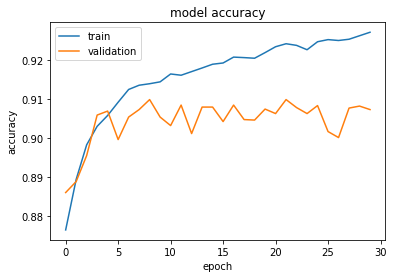

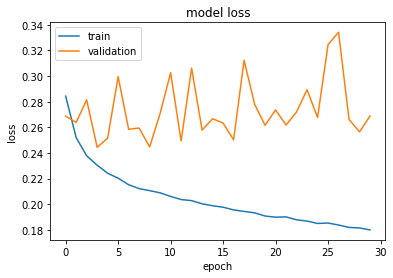

In [35]:
plt.plot(historyean.history['accuracy'])
plt.plot(historyean.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyean.history['loss'])
plt.plot(historyean.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()